# Задание
Требуется выполнить следующие действия<cite data-cite="ue:dz"></cite>:

1. Поиск и выбор набора данных для&nbsp;построения моделей машинного обучения. На&nbsp;основе выбранного набора данных студент должен построить модели машинного обучения для&nbsp;решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для&nbsp;понимания структуры данных. Анализ и заполнение пропусков в&nbsp;данных.
3. Выбор признаков, подходящих для&nbsp;построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о&nbsp;возможности построения моделей машинного обучения. В&nbsp;зависимости от&nbsp;набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для&nbsp;последующей оценки качества моделей. Необходимо выбрать не&nbsp;менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для&nbsp;решения задачи классификации или регрессии. Необходимо использовать не&nbsp;менее трех моделей, хотя бы одна из&nbsp;которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на&nbsp;основе исходного набора данных.
8. Построение базового решения (baseline) для&nbsp;выбранных моделей без&nbsp;подбора гиперпараметров. Производится обучение моделей на&nbsp;основе обучающей выборки и оценка качества моделей на&nbsp;основе тестовой выборки.
9. Подбор гиперпараметров для&nbsp;выбранных моделей. Рекомендуется подбирать не&nbsp;более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В&nbsp;зависимости от&nbsp;используемой библиотеки можно применять функцию `GridSearchCV`, использовать перебор параметров в&nbsp;цикле, или использовать другие методы.
10. Повторение пункта 8 для&nbsp;найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с&nbsp;качеством baseline-моделей.
11. Формирование выводов о&nbsp;качестве построенных моделей на&nbsp;основе выбранных метрик.

# Ход выполнения работы

## Выбор набора данных
В&nbsp;качестве набора данных используются датасет с оценками сомелье и химический состав вин. Данный набор данных доступен по&nbsp;следующему адресу: <https://www.kaggle.com/rajyellow46/wine-quality>.

### Текстовое описание набора данных
Выбранный набор данных состоит из&nbsp;одного файла `wine.csv`, содержащего все данные датасета. Данный файл содержит следующие колонки:

* `fixed acidity` — кислотность вина;
* `volatile acidity` — кислотность паров;
* `citric acid` — лимонная кислота;
* `residual sugar` — сахар;
* `chlorides` — хлориды;
* `free sulfur dioxide` — свободный диоксид серы;
* `total sulfur dioxide` — общее кол-во диоксида серы;
* `density` — плотность;
* `pH` — pH;
* `sulphates` — сульфаты;
* `alcohol` — содержание алкоголя;
* `quality` — оценка сомелье;

### Постановка задачи и предварительный анализ набора данных
Очевидно, что данный набор данных предполагает задачу регрессии, а&nbsp;именно предсказание колонки `quality` — оценки сомелье. Остальные колоки предоставляют данные, которые теоретически могут показывать, какую именно оценку поставил эксперт и почему.

## Проведение разведочного анализа данных

Подключим все необходимые библиотеки:

In [89]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [90]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в&nbsp;дальнейшем текст в&nbsp;отчёте влезал на&nbsp;А4<cite data-cite="doc:pandas"></cite>:

In [19]:
pd.set_option("display.width", 70)

### Предварительная подготовка данных

Загрузим описанный выше набор данных:

In [22]:
data = pd.read_csv("./wine.csv")

Проверим полученные типы:

In [23]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Посмотрим на данные в&nbsp;данном наборе данных:

In [24]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df = data.copy()

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Проверим размер набора данных:

In [27]:
df.shape

(1599, 12)

Проверим основные статистические характеристики набора данных:

In [28]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Проверим наличие пропусков в&nbsp;данных:

In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Визуальное исследование датасета

Оценим распределение целевого признака — оценки сомелье:

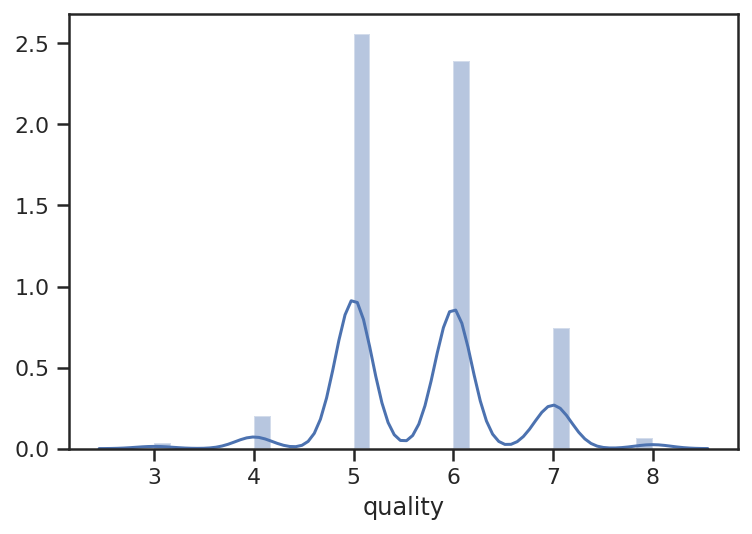

In [30]:
sns.distplot(df["quality"]);

Видно, что оценка большинста вин находится в интервале 5-6. Оценим, насколько оценка зависит от&nbsp; содержания алкоголя:

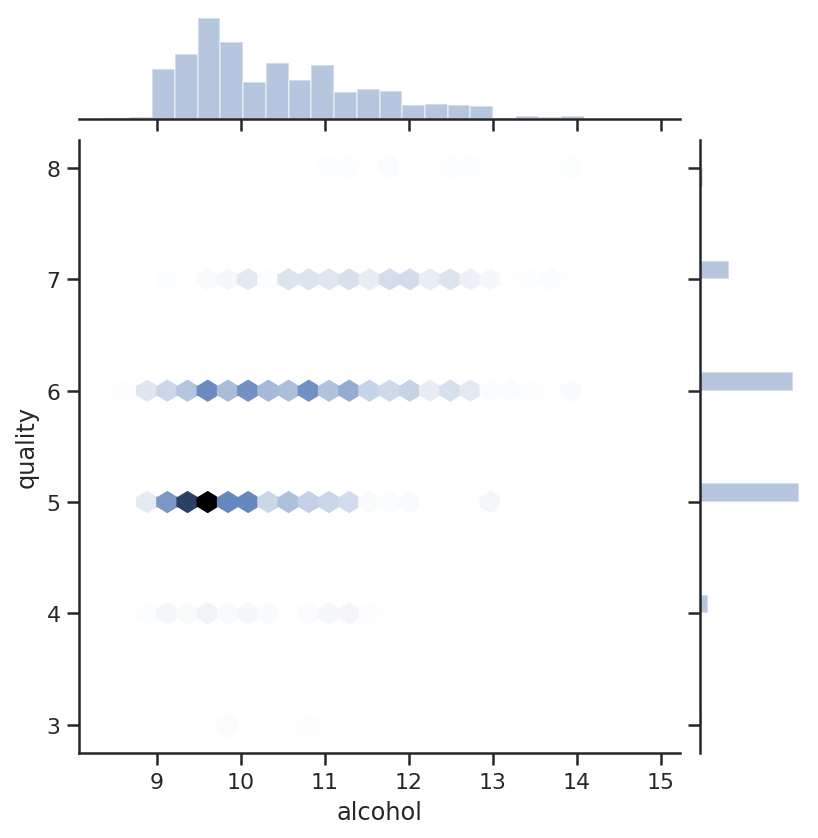

In [33]:
sns.jointplot(x="alcohol", y="quality", data=df, kind="hex");

Видно, что большое содержание алкоголя влияет на оценку не лучшим образом.

Построим парные диаграммы по&nbsp;всем показателям по&nbsp;исходному набору данных:

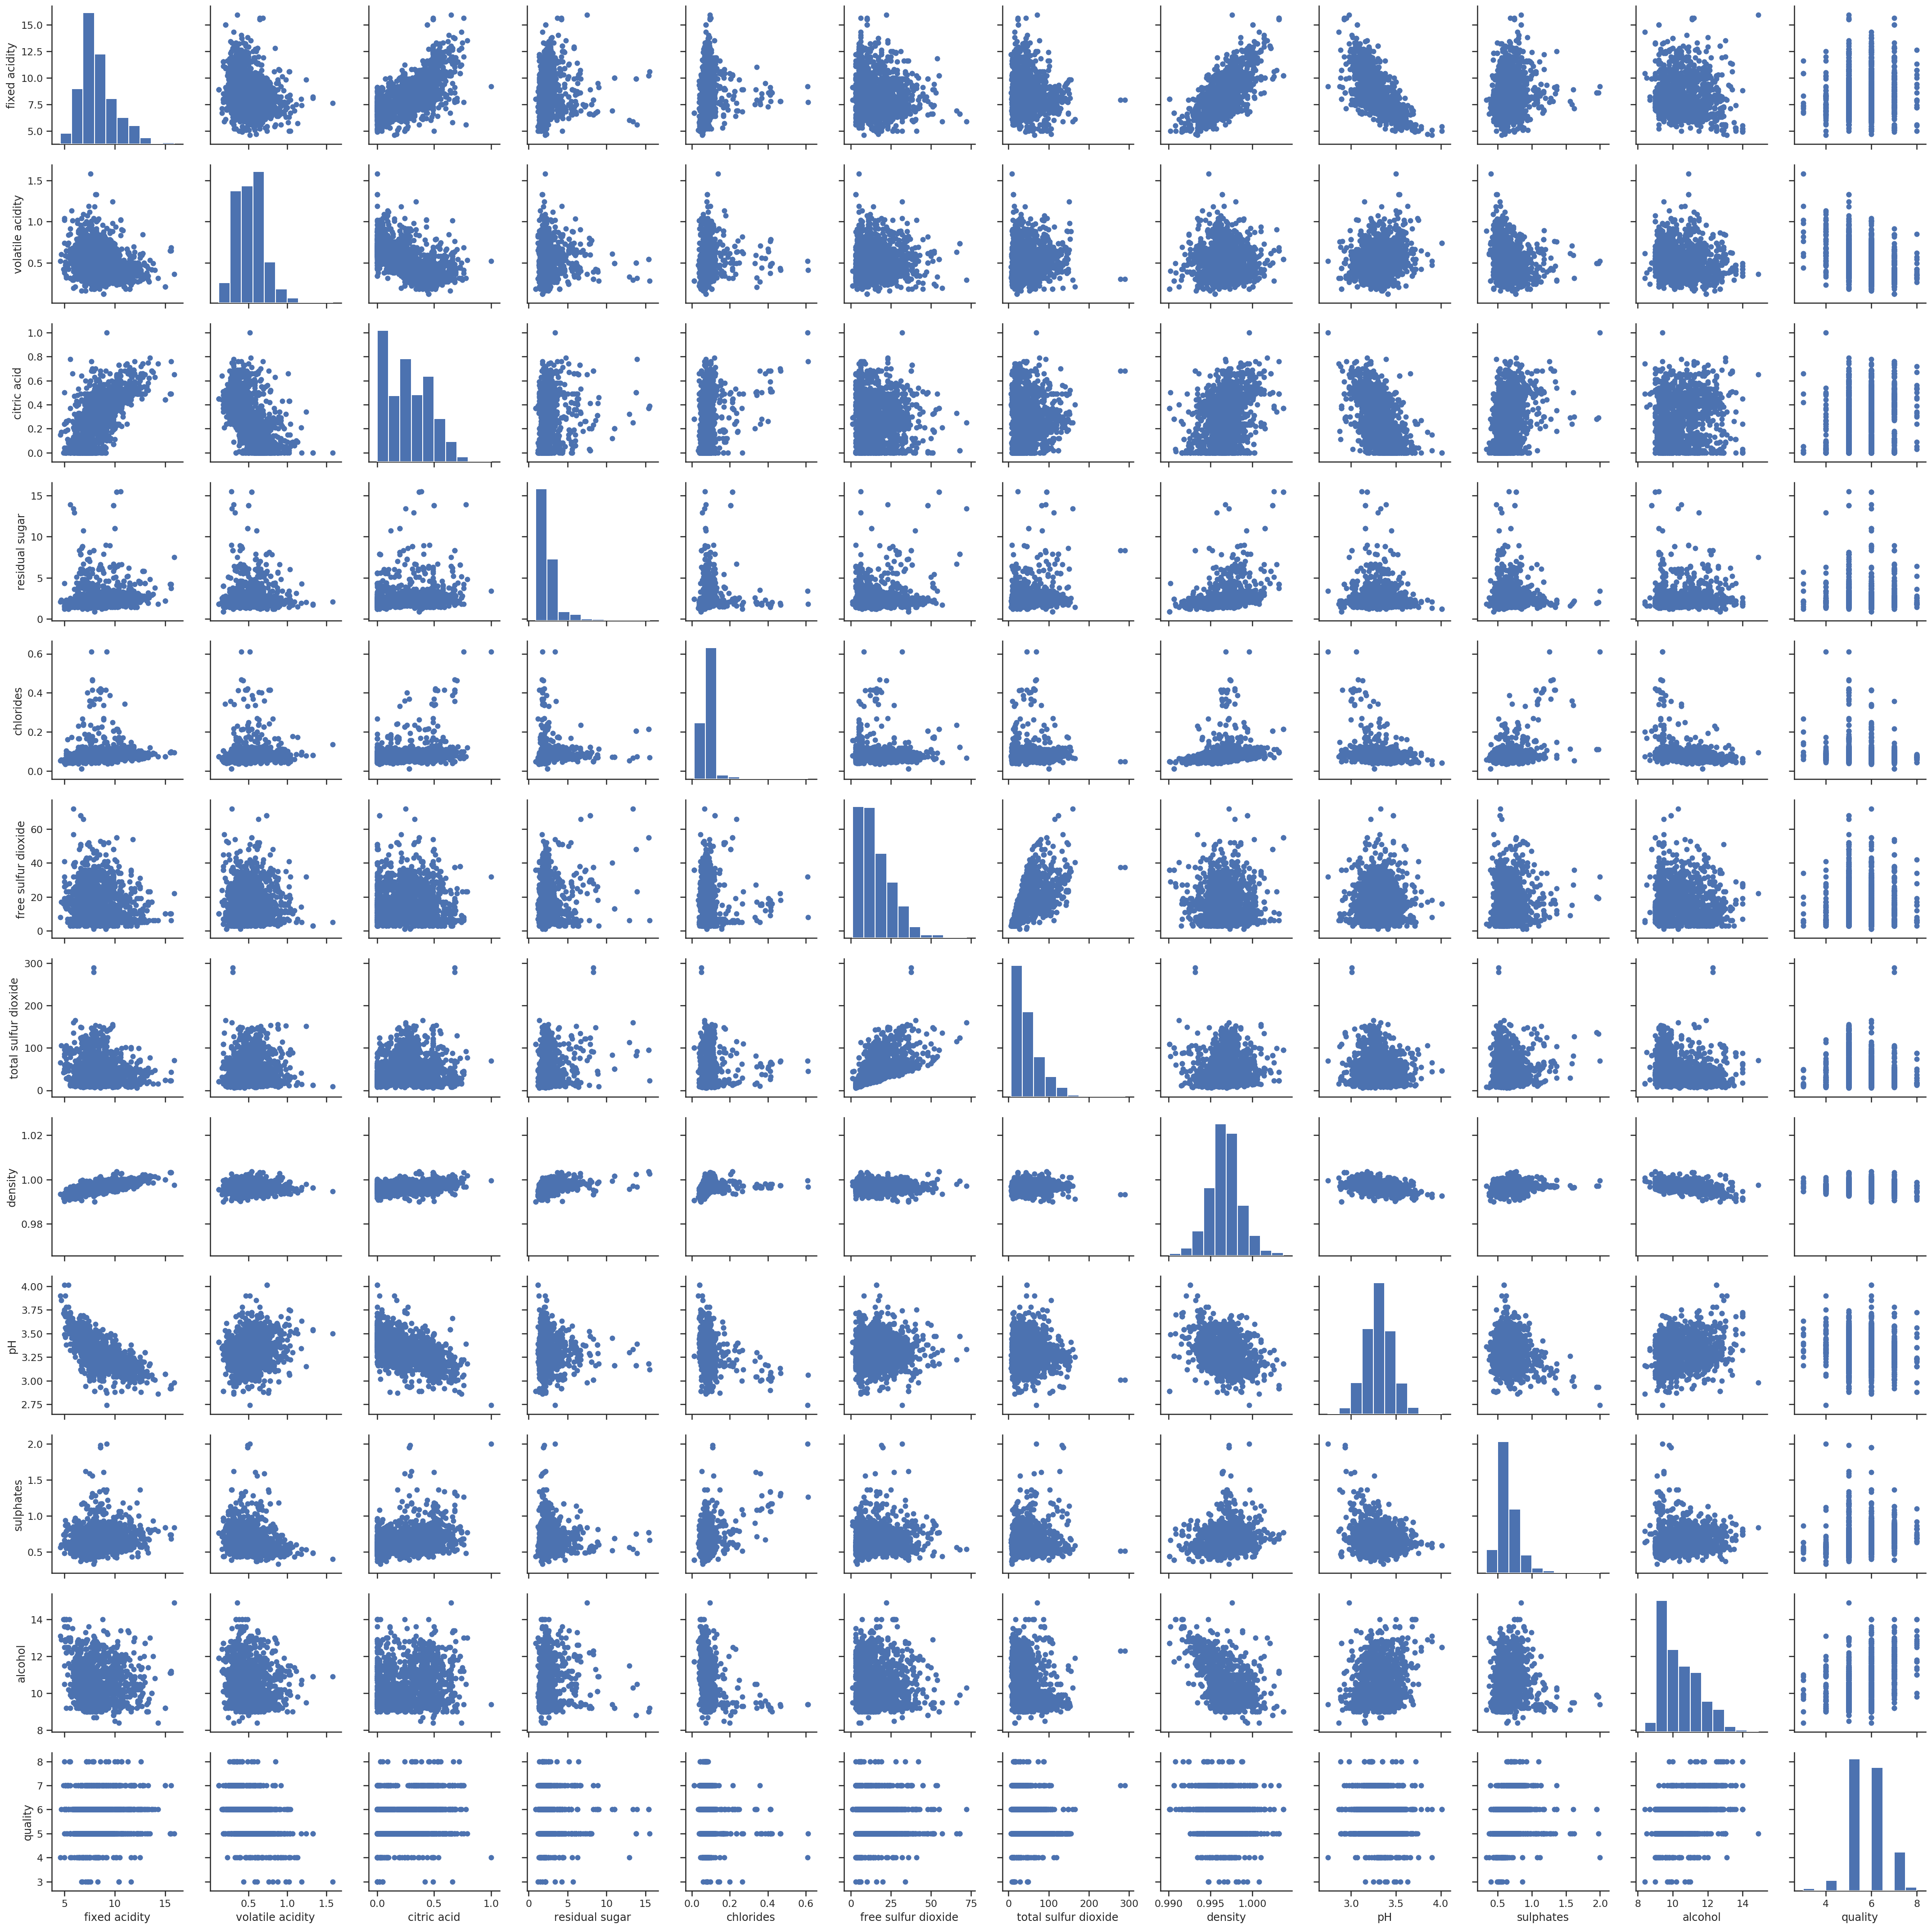

In [34]:
sns.pairplot(df, plot_kws=dict(linewidth=0));

Видно, что зависимости между колонками весьма сложные и в&nbsp;большинстве своём нелинейные. Какого-то показателя, точно определяющего оценку вина, не&nbsp;наблюдается.

### Корреляционный анализ

Построим корреляционную матрицу по всему набору данных:

In [35]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Визуализируем корреляционную матрицу с&nbsp;помощью тепловой карты:

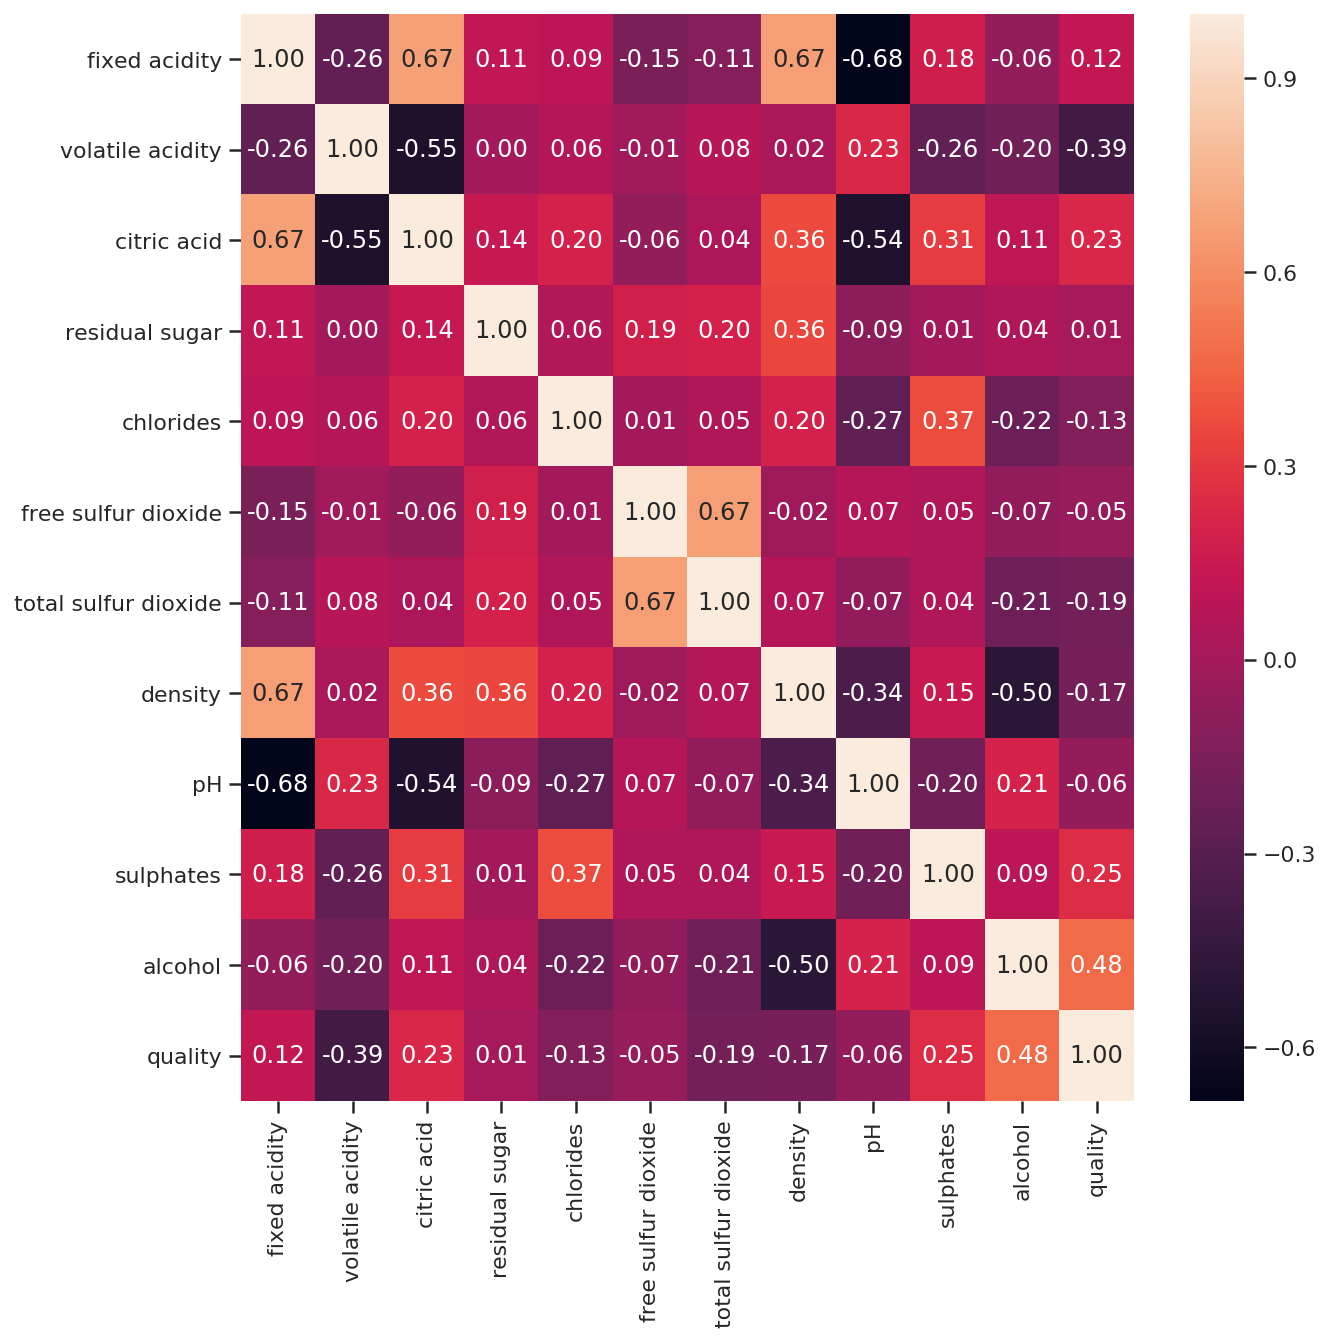

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f",ax=ax);

Видно, что оценка заметно коррелирует с&nbsp;содержанием алкоголя, что было показано выше с&nbsp;помощью парного графика. Остальные признаки коррелируют друг с&nbsp;другом довольно слабо. Построению моделей машинного обучения ничего не&nbsp;мешает, но насколько хорошо они будут работать — вопрос открытый.

## Подготовка данных для обучения моделей
Разделим данные на&nbsp;целевой столбец и признаки:

In [37]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [38]:
print(X.head(), "\n")
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56   
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68   
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65   
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58   
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4   

0    5
1    5
2    5
3    6
4    5
Na

In [39]:
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


Предобработаем данные, чтобы методы работали лучше:

In [40]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.821556e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


## Выбор метрик

Напишем функцию, которая считает метрики построенной модели:

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

Очевидно, что все эти метрики подходят для&nbsp;задачи регрессии. При&nbsp;этом средняя абсолютная ошибка (`mean_absolute_error`) будет показывать, насколько в&nbsp;среднем мы ошибаемся, медианная абсолютная ошибка (`median_absolute_error`) — насколько мы ошибаемся на&nbsp;половине выборки, а коэффициент детерминации $R^2$ (`r2_score`) хорош тем, что он показывает качество модели машинного обучения в&nbsp;задачи регрессии без&nbsp;сравнения с&nbsp;другими моделями.

## Выбор моделей
В качестве моделей машинного обучения выберем хорошо показавшие себя в&nbsp;лабораторных работах модели:

* Метод $k$ ближайших соседей (`KNeighborsRegressor`)
* Дерево решений (`DecisionTreeRegressor`)
* Случайный лес (`RandomForestRegressor`)

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Формирование обучающей и тестовой выборок

Разделим выборку на&nbsp;обучающую и тестовую:

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.25, random_state=346705925)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1199, 11)
(400, 11)
(1199,)
(400,)


## Построение базового решения

## Метод $k$ ближайших соседей

Попробуем метод $k$ ближайших соседей с&nbsp;гиперпараметром $k=5$:

In [48]:
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Проверим метрики построенной модели:

In [49]:
test_model(knn_5)

mean_absolute_error: 0.506
median_absolute_error: 0.40000000000000036
r2_score: 0.2321892421893451


Видно, что данный метод без настройки гиперпараметров показывает неудовлетворительный результат.

## Дерево решений

Попробуем дерево решений с неограниченной глубиной дерева:

In [50]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим метрики построенной модели:

In [51]:
test_model(dt_none)

mean_absolute_error: 0.4175
median_absolute_error: 0.0
r2_score: 0.06775223564923682


Видно, что данный метод также без настройки гиперпараметров показывает плохой результат.

### Случайный лес

Попробуем случайный лес с&nbsp;гиперпараметром $n=100$:

In [52]:
ran_100 = RandomForestRegressor(n_estimators=100)
ran_100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Проверим метрики построенной модели:

In [53]:
test_model(ran_100)

mean_absolute_error: 0.41292500000000004
median_absolute_error: 0.29000000000000004
r2_score: 0.43461719319500214


Видно, что данный метод даже без&nbsp;настройки гиперпараметров показывает неплохой результат.

## Подбор гиперпараметров

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

### Метод $k$ ближайших соседей

Введем список настраиваемых параметров:

In [55]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [56]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=47, p=2,
                    weights='uniform')

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

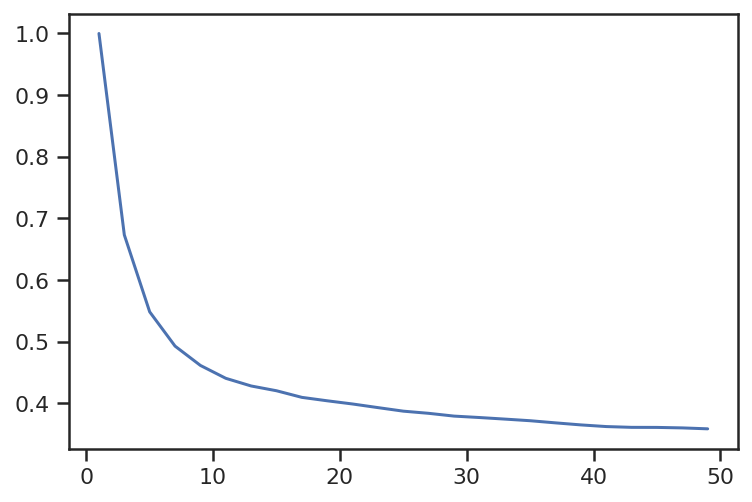

In [57]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

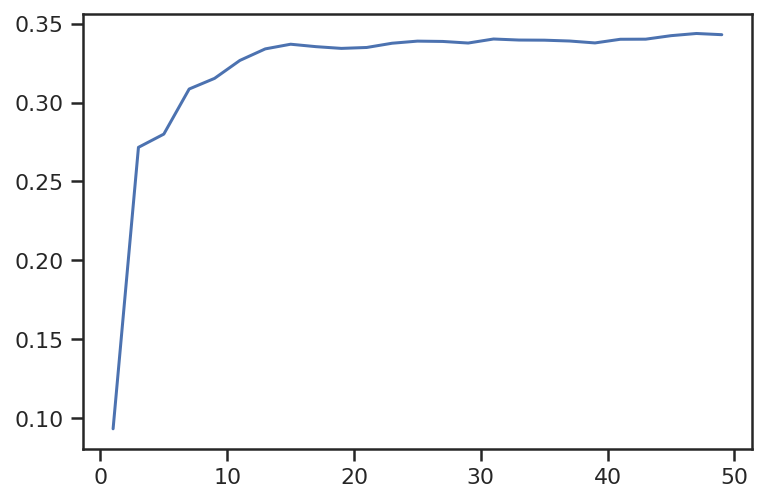

In [58]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Видно, что наилучший результат достигается при $k=7$.

In [59]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.5154787234042553
median_absolute_error: 0.4255319148936172
r2_score: 0.32251254867487245


Сравним с исходной моделью:

In [60]:
test_model(knn_5)

mean_absolute_error: 0.506
median_absolute_error: 0.40000000000000036
r2_score: 0.2321892421893451


Здесь получили улучшение коэффициент детерминации модели.

### Дерево решений

Введем список настраиваемых параметров:

In [77]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [78]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

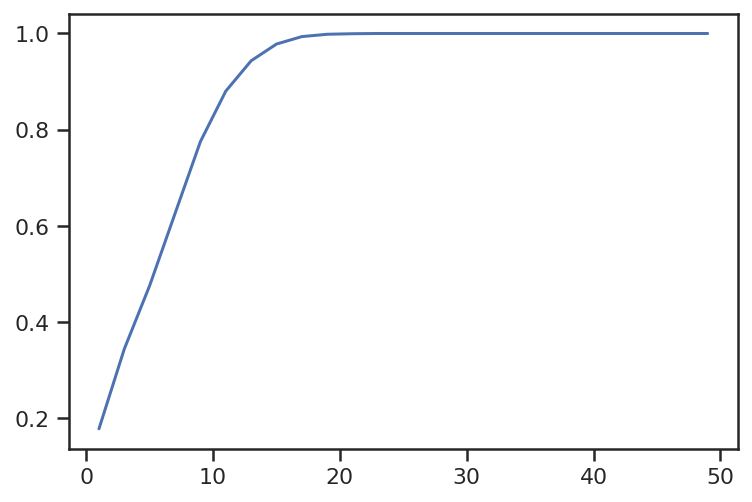

In [79]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

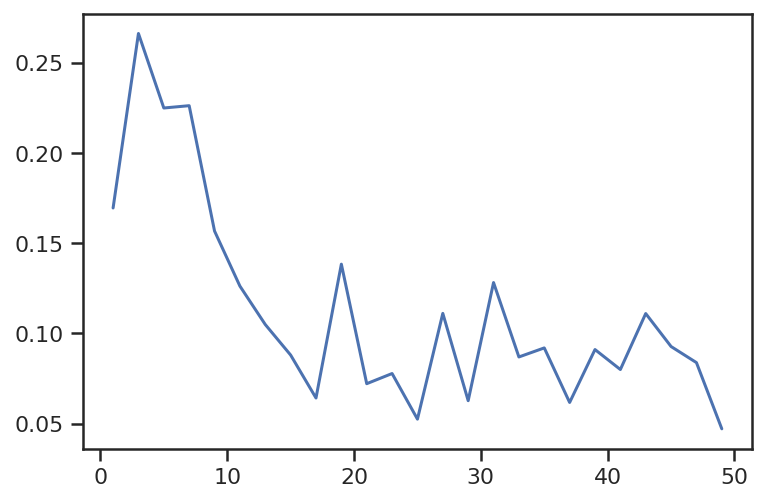

In [80]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

На&nbsp;графике чётко видно, что модель сначала работает хорошо, а потом начинает переобучаться на&nbsp;тренировочной выборке и ухудшается.

In [81]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.5080852169910002
median_absolute_error: 0.3644859813084116
r2_score: 0.3024642156695695


Сравним с исходной моделью:

In [82]:
test_model(dt_none)

mean_absolute_error: 0.4175
median_absolute_error: 0.0
r2_score: 0.06775223564923682


Конкретно данная модель оказалась заметно лучше, чем исходная.

### Случайный лес

Введем список настраиваемых параметров:

In [83]:
param_range = np.arange(20, 201, 20)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}]

Запустим подбор параметра:

In [84]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

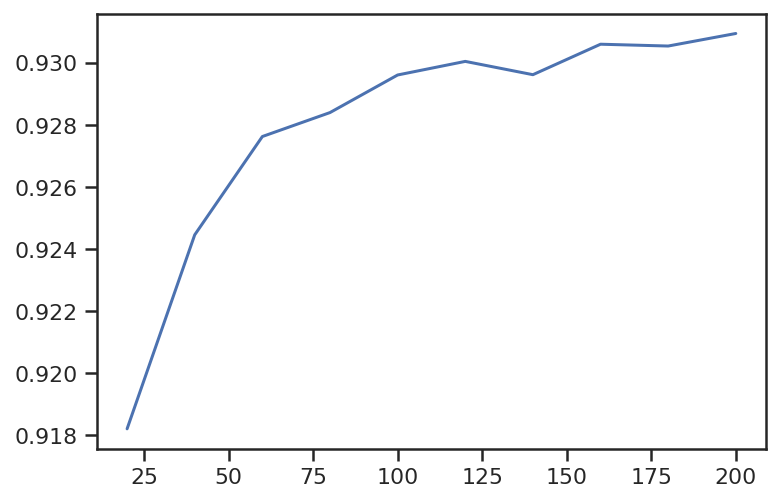

In [85]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

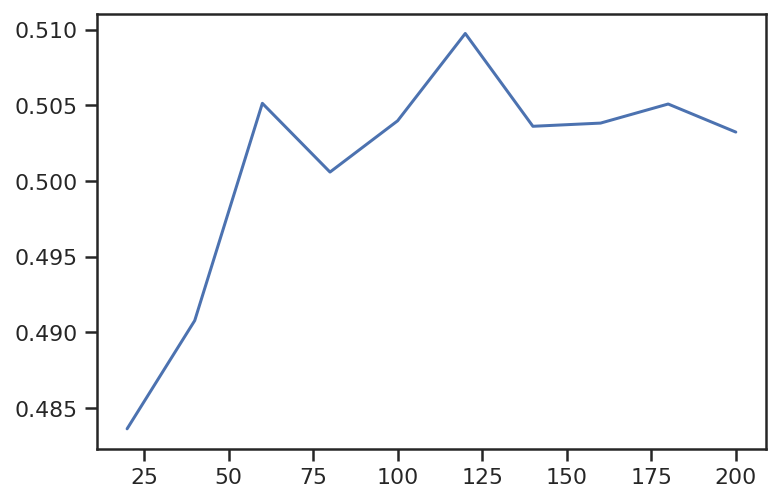

In [86]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Из-за случайнойсти график немного плавает, но в&nbsp;целом получился чётко выраженный пик с&nbsp;наилучшим результатом.

In [87]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.4136666666666667
median_absolute_error: 0.2791666666666668
r2_score: 0.4430783569532428


Сравним с исходной моделью:

In [88]:
test_model(ran_100)

mean_absolute_error: 0.41292500000000004
median_absolute_error: 0.29000000000000004
r2_score: 0.43461719319500214


Данная модель также оказалась лишь немного лучше, чем исходная.

# Выводы

Все построенные модели обладают средними показателями. Возможно проблема в небольшом кол-ве данных. Ансамблевая модель при&nbsp;этом обладает наилучшими характеристиками. Таким образом для&nbsp;дальнейшей работы стоит использовать именно ее.